In [1]:
import numpy as np
import pandas as pd


# 日期和时间数据类型和工具

### 基本用法

In [4]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2023, 4, 11, 8, 24, 47, 161416)

In [5]:
now.year, now.month, now.day

(2023, 4, 11)

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [7]:
delta.days

926

In [8]:
 delta.seconds

56700

In [9]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [10]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 字符串和日期时间之间的转换

#### 日期转字符串

In [11]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [12]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

#### 字符串转日期

In [14]:
value = "2011-01-03"
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
datestrs = ["7/6/2011", "8/6/2011"]
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

#### 使用pandas转换

In [16]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [17]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

# 时间序列基础

In [18]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
        datetime(2011, 1, 7), datetime(2011, 1, 8),
        datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2011-01-02   -0.061105
2011-01-05    1.021665
2011-01-07    1.191155
2011-01-08   -0.180925
2011-01-10    0.767471
2011-01-12   -0.367204
dtype: float64

In [19]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [20]:
ts + ts[::2]

2011-01-02   -0.122210
2011-01-05         NaN
2011-01-07    2.382310
2011-01-08         NaN
2011-01-10    1.534943
2011-01-12         NaN
dtype: float64

In [21]:
ts.index.dtype

dtype('<M8[ns]')

In [22]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### 索引、选择、子集

#### 选择数据

In [24]:
stamp = ts.index[2]
ts[stamp]

1.1911549629137288

In [25]:
ts["2011-01-10"]

0.7674713240771992

#### 指定日期范围 选择范围

In [26]:
longer_ts = pd.Series(np.random.standard_normal(1000),
      index=pd.date_range("2000-01-01", periods=1000))
longer_ts

2000-01-01    0.130415
2000-01-02    0.386075
2000-01-03   -0.463449
2000-01-04    1.541309
2000-01-05   -0.388990
                ...   
2002-09-22    0.425631
2002-09-23    1.068012
2002-09-24    0.382617
2002-09-25   -0.163166
2002-09-26   -0.166239
Freq: D, Length: 1000, dtype: float64

In [27]:
longer_ts["2001"]

2001-01-01    0.438038
2001-01-02   -1.731731
2001-01-03   -0.390308
2001-01-04   -1.139755
2001-01-05    0.947288
                ...   
2001-12-27   -0.323916
2001-12-28   -0.114551
2001-12-29   -1.725651
2001-12-30    0.365703
2001-12-31    0.766373
Freq: D, Length: 365, dtype: float64

In [28]:
longer_ts["2001-05"]

2001-05-01    1.057677
2001-05-02   -0.353360
2001-05-03   -1.984649
2001-05-04    1.483626
2001-05-05   -0.043039
2001-05-06    1.812579
2001-05-07   -0.205490
2001-05-08    1.791346
2001-05-09   -0.108623
2001-05-10   -1.354917
2001-05-11    1.476733
2001-05-12    0.541515
2001-05-13   -1.334623
2001-05-14    0.070752
2001-05-15    0.856084
2001-05-16    1.204370
2001-05-17    1.685288
2001-05-18    0.234463
2001-05-19   -0.110048
2001-05-20    1.201643
2001-05-21   -0.203268
2001-05-22   -0.886934
2001-05-23    1.071050
2001-05-24    1.140483
2001-05-25    1.418824
2001-05-26    2.741613
2001-05-27   -0.666966
2001-05-28   -0.468180
2001-05-29   -1.519452
2001-05-30    1.110792
2001-05-31    1.224614
Freq: D, dtype: float64

In [29]:
ts[datetime(2011, 1, 7):]

2011-01-07    1.191155
2011-01-08   -0.180925
2011-01-10    0.767471
2011-01-12   -0.367204
dtype: float64

In [30]:
ts[datetime(2011, 1, 7):datetime(2011, 1, 10)]

2011-01-07    1.191155
2011-01-08   -0.180925
2011-01-10    0.767471
dtype: float64

In [32]:
ts

2011-01-02   -0.061105
2011-01-05    1.021665
2011-01-07    1.191155
2011-01-08   -0.180925
2011-01-10    0.767471
2011-01-12   -0.367204
dtype: float64

In [33]:
ts["2011-01-06":"2011-01-11"]

2011-01-07    1.191155
2011-01-08   -0.180925
2011-01-10    0.767471
dtype: float64

#### 截断

In [34]:
ts.truncate(after="2011-01-09")

2011-01-02   -0.061105
2011-01-05    1.021665
2011-01-07    1.191155
2011-01-08   -0.180925
dtype: float64

#### 指定频率

In [35]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
        index=dates,
        columns=["Colorado", "Texas","New York", "Ohio"])
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,-0.144635,1.658174,-2.154550,-0.417457
2001-05-09,-0.163324,0.769491,1.255830,-0.272758
2001-05-16,2.079551,0.532810,-0.868370,-0.491292
2001-05-23,0.628208,-0.279973,-0.991623,-1.412615
2001-05-30,0.636547,-1.118099,0.621412,1.208234


### 具有重复索引的时间序列

In [36]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
        "2000-01-02", "2000-01-03"])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

#### 检查

In [37]:
 dup_ts.index.is_unique

False

In [38]:
dup_ts["2000-01-03"]

4

In [39]:
 dup_ts["2000-01-02"]

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

#### 处理

In [41]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [42]:
 grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 日期范围、频率和变化

In [43]:
ts

2011-01-02   -0.061105
2011-01-05    1.021665
2011-01-07    1.191155
2011-01-08   -0.180925
2011-01-10    0.767471
2011-01-12   -0.367204
dtype: float64

In [45]:
resampler = ts.resample("D")
resampler

### 生成日期范围

In [46]:
index = pd.date_range("2012-04-01", "2012-06-01")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [47]:
 pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [48]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [49]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM")

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [50]:
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

#### 将日期标准化

In [51]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 频率倍数

In [52]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [53]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [54]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [55]:
Hour(2) + Minute(30)

<150 * Minutes>

In [56]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### 指定星期几

In [57]:
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")
list(monthly_dates)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 移动（领先和滞后）数据

In [58]:
ts = pd.Series(np.random.standard_normal(4),
      index=pd.date_range("2000-01-01", periods=4, freq="M"))
ts

2000-01-31   -1.429433
2000-02-29    0.666806
2000-03-31   -0.975770
2000-04-30    0.136292
Freq: M, dtype: float64

In [59]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -1.429433
2000-04-30    0.666806
Freq: M, dtype: float64

In [60]:
ts.shift(-2)

2000-01-31   -0.975770
2000-02-29    0.136292
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [61]:
 ts.shift(2, freq="M")

2000-03-31   -1.429433
2000-04-30    0.666806
2000-05-31   -0.975770
2000-06-30    0.136292
Freq: M, dtype: float64

In [62]:
ts.shift(3, freq="D")

2000-02-03   -1.429433
2000-03-03    0.666806
2000-04-03   -0.975770
2000-05-03    0.136292
dtype: float64

In [63]:
ts.shift(1, freq="90T")

2000-01-31 01:30:00   -1.429433
2000-02-29 01:30:00    0.666806
2000-03-31 01:30:00   -0.975770
2000-04-30 01:30:00    0.136292
dtype: float64

#### 带偏移量的移位日期

In [64]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()


Timestamp('2011-11-20 00:00:00')

In [65]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [66]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [67]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [68]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [70]:
ts = pd.Series(np.random.standard_normal(20),
     index=pd.date_range("2000-01-15", periods=20, freq="4D"))
ts

2000-01-15   -1.995103
2000-01-19   -0.517519
2000-01-23    1.724711
2000-01-27   -0.549582
2000-01-31    0.819040
2000-02-04   -1.447258
2000-02-08    0.433000
2000-02-12   -0.491006
2000-02-16    0.612165
2000-02-20   -0.038071
2000-02-24    1.535130
2000-02-28   -1.238763
2000-03-03   -0.091933
2000-03-07   -0.211026
2000-03-11    0.232392
2000-03-15   -0.374337
2000-03-19    0.901341
2000-03-23   -0.466680
2000-03-27   -0.541048
2000-03-31   -0.864804
Freq: 4D, dtype: float64

#### 应用偏移后分组

In [71]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31   -0.103691
2000-02-29   -0.090686
2000-03-31   -0.177012
dtype: float64

In [72]:
ts.resample("M").mean()

2000-01-31   -0.103691
2000-02-29   -0.090686
2000-03-31   -0.177012
Freq: M, dtype: float64

# 时区处理

In [73]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [74]:
tz = pytz.timezone("America/New_York")
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### 时区本地化和转换

In [75]:
dates = pd.date_range("2012-03-09 09:30", periods=6)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-09 09:30:00    0.945140
2012-03-10 09:30:00   -0.594849
2012-03-11 09:30:00   -0.471728
2012-03-12 09:30:00    0.407517
2012-03-13 09:30:00   -0.193758
2012-03-14 09:30:00   -0.358668
Freq: D, dtype: float64

In [76]:
print(ts.index.tz)

None


#### 创建日期时指定时区

In [77]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [78]:
ts

2012-03-09 09:30:00    0.945140
2012-03-10 09:30:00   -0.594849
2012-03-11 09:30:00   -0.471728
2012-03-12 09:30:00    0.407517
2012-03-13 09:30:00   -0.193758
2012-03-14 09:30:00   -0.358668
Freq: D, dtype: float64

#### 转换时区

In [79]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-09 09:30:00+00:00    0.945140
2012-03-10 09:30:00+00:00   -0.594849
2012-03-11 09:30:00+00:00   -0.471728
2012-03-12 09:30:00+00:00    0.407517
2012-03-13 09:30:00+00:00   -0.193758
2012-03-14 09:30:00+00:00   -0.358668
Freq: D, dtype: float64

In [81]:
print(ts_utc.index.tz)
ts_utc.index

UTC


DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [82]:
ts_utc.tz_convert("America/New_York")

2012-03-09 04:30:00-05:00    0.945140
2012-03-10 04:30:00-05:00   -0.594849
2012-03-11 05:30:00-04:00   -0.471728
2012-03-12 05:30:00-04:00    0.407517
2012-03-13 05:30:00-04:00   -0.193758
2012-03-14 05:30:00-04:00   -0.358668
Freq: D, dtype: float64

In [83]:
ts_eastern = ts.tz_localize("America/New_York")
ts_eastern.tz_convert("UTC")

2012-03-09 14:30:00+00:00    0.945140
2012-03-10 14:30:00+00:00   -0.594849
2012-03-11 13:30:00+00:00   -0.471728
2012-03-12 13:30:00+00:00    0.407517
2012-03-13 13:30:00+00:00   -0.193758
2012-03-14 13:30:00+00:00   -0.358668
dtype: float64

In [84]:
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 15:30:00+01:00    0.945140
2012-03-10 15:30:00+01:00   -0.594849
2012-03-11 14:30:00+01:00   -0.471728
2012-03-12 14:30:00+01:00    0.407517
2012-03-13 14:30:00+01:00   -0.193758
2012-03-14 14:30:00+01:00   -0.358668
dtype: float64

In [85]:
ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### 操纵时区感知时间戳对象

In [86]:
stamp = pd.Timestamp("2011-03-12 04:00")
stamp_utc = stamp.tz_localize("utc")
stamp_utc.tz_convert("America/New_York")


Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [87]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [88]:
stamp_utc.value

1299902400000000000

In [89]:
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

In [90]:
stamp = pd.Timestamp("2012-03-11 01:30", tz="US/Eastern")
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [91]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [93]:
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern")
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [94]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 不同时区之间的操作

In [95]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-07 09:30:00    0.336662
2012-03-08 09:30:00   -1.511387
2012-03-09 09:30:00    1.417544
2012-03-12 09:30:00   -0.259554
2012-03-13 09:30:00   -1.708455
2012-03-14 09:30:00    0.185001
2012-03-15 09:30:00   -0.573326
2012-03-16 09:30:00   -0.123705
2012-03-19 09:30:00   -1.467578
2012-03-20 09:30:00   -0.661914
Freq: B, dtype: float64

In [97]:
ts1 = ts[:7].tz_localize("Europe/London")
ts2 = ts1[2:].tz_convert("Europe/Moscow")
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# 周期计算

### 基本

In [98]:
p = pd.Period("2011", freq="A-DEC")
p

Period('2011', 'A-DEC')

In [99]:
p+5

Period('2016', 'A-DEC')

In [101]:
p-2

Period('2009', 'A-DEC')

In [102]:
pd.Period("2014", freq="A-DEC") - p

<3 * YearEnds: month=12>

#### 指定频率的方式来指定周期

In [104]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [105]:
pd.Series(np.random.standard_normal(6), index=periods)

2000-01    1.996224
2000-02    0.006479
2000-03    0.119059
2000-04   -0.926947
2000-05    1.323852
2000-06   -1.639366
Freq: M, dtype: float64

#### 字符串指定周期

In [106]:
values = ["2001Q3", "2002Q2", "2003Q1"]
index = pd.PeriodIndex(values, freq="Q-DEC")
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### 周期频率转换

In [107]:
p = pd.Period("2011", freq="A-DEC")
p

Period('2011', 'A-DEC')

#### 年周期转为月周期

In [108]:
p.asfreq("M", how="start")

Period('2011-01', 'M')

In [109]:
p.asfreq("M", how="end")

Period('2011-12', 'M')

In [110]:
p.asfreq("M")

Period('2011-12', 'M')

#### 另一种年周期

In [112]:
p = pd.Period("2011", freq="A-JUN")
p

Period('2011', 'A-JUN')

In [113]:
p.asfreq("M", how="start")

Period('2010-07', 'M')

In [114]:
p.asfreq("M", how="end")

Period('2011-06', 'M')

In [115]:
p = pd.Period("Aug-2011", "M")
p.asfreq("A-JUN")

Period('2012', 'A-JUN')

In [116]:
periods = pd.period_range("2006", "2009", freq="A-DEC")
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)
ts

2006   -0.100942
2007    0.024322
2008    0.130038
2009    0.494239
Freq: A-DEC, dtype: float64

In [117]:
ts.asfreq("M", how="start")

2006-01   -0.100942
2007-01    0.024322
2008-01    0.130038
2009-01    0.494239
Freq: M, dtype: float64

In [118]:
ts.asfreq("B", how="end")

2006-12-29   -0.100942
2007-12-31    0.024322
2008-12-31    0.130038
2009-12-31    0.494239
Freq: B, dtype: float64

### 季度期间频率

In [120]:
p = pd.Period("2012Q4", freq="Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [121]:
p.asfreq("D", how="start")

Period('2011-11-01', 'D')

In [122]:
p.asfreq("D", how="end")

Period('2012-01-31', 'D')

#### 得到具体时间

In [123]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [124]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [125]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")
ts = pd.Series(np.arange(len(periods)), index=periods)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [127]:
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16
ts.index = new_periods.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### 将时间戳转换为时段（和返回）

In [128]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")
ts = pd.Series(np.random.standard_normal(3), index=dates)
ts

2000-01-31    0.572096
2000-02-29    1.508218
2000-03-31   -0.913641
Freq: M, dtype: float64

#### 转成周期

In [130]:
pts = ts.to_period()
pts

2000-01    0.572096
2000-02    1.508218
2000-03   -0.913641
Freq: M, dtype: float64

In [131]:
dates = pd.date_range("2000-01-29", periods=6)
ts2 = pd.Series(np.random.standard_normal(6), index=dates)
ts2

2000-01-29    0.536846
2000-01-30   -0.973251
2000-01-31   -1.058267
2000-02-01   -0.587270
2000-02-02    0.161059
2000-02-03    0.046588
Freq: D, dtype: float64

In [132]:
ts2.to_period("M")

2000-01    0.536846
2000-01   -0.973251
2000-01   -1.058267
2000-02   -0.587270
2000-02    0.161059
2000-02    0.046588
Freq: M, dtype: float64

In [133]:
pts = ts2.to_period()
pts

2000-01-29    0.536846
2000-01-30   -0.973251
2000-01-31   -1.058267
2000-02-01   -0.587270
2000-02-02    0.161059
2000-02-03    0.046588
Freq: D, dtype: float64

#### 转回时间戳

In [134]:
pts.to_timestamp(how="end")

2000-01-29 23:59:59.999999999    0.536846
2000-01-30 23:59:59.999999999   -0.973251
2000-01-31 23:59:59.999999999   -1.058267
2000-02-01 23:59:59.999999999   -0.587270
2000-02-02 23:59:59.999999999    0.161059
2000-02-03 23:59:59.999999999    0.046588
Freq: D, dtype: float64

### 从数组创建周期索引

In [135]:
path_prefix = "/content/drive/MyDrive/Colab Notebooks/learn-pydata/"
data = pd.read_csv(path_prefix+"examples/macrodata.csv")
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [136]:
data["year"]

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [137]:
data["quarter"]

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [138]:
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],freq="Q-DEC")
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [140]:
data.index = index
data["infl"]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 重采样和频率转换

In [141]:
dates = pd.date_range("2000-01-01", periods=100)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2000-01-01    0.610173
2000-01-02    0.624368
2000-01-03    0.393209
2000-01-04    0.817005
2000-01-05   -0.619421
                ...   
2000-04-05   -1.564289
2000-04-06    0.889342
2000-04-07    0.511131
2000-04-08   -0.439607
2000-04-09   -0.273472
Freq: D, Length: 100, dtype: float64

In [142]:
ts.resample("M").mean()

2000-01-31    0.320877
2000-02-29   -0.026670
2000-03-31   -0.321890
2000-04-30   -0.286951
Freq: M, dtype: float64

In [143]:
ts.resample("M", kind="period").mean()

2000-01    0.320877
2000-02   -0.026670
2000-03   -0.321890
2000-04   -0.286951
Freq: M, dtype: float64

### 下降采样 小周期->大周期

In [144]:
dates = pd.date_range("2000-01-01", periods=12, freq="T")
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [145]:
ts.resample("5min").sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [146]:
ts.resample("5min", closed="right").sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [147]:
ts.resample("5min", closed="right", label="right").sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

#### 引入偏移量

In [148]:
from pandas.tseries.frequencies import to_offset
result = ts.resample("5min", closed="right", label="right").sum()
result.index = result.index + to_offset("-1s")
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### Open-high-low-close (OHLC) resampling

In [151]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,8,9,2,9
2000-01-01 00:05:00,10,10,0,0
2000-01-01 00:10:00,11,11,6,6


### 上升采样和插值

In [152]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
        index=pd.date_range("2000-01-01", periods=2,
        freq="W-WED"),
        columns=["Colorado", "Texas", "New York", "Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.599352,-0.693001,-0.720000,0.043865
2000-01-12,-0.141678,-0.003382,2.236971,2.243358


In [153]:
df_daily = frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.599352,-0.693001,-0.720000,0.043865
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.141678,-0.003382,2.236971,2.243358


In [154]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.599352,-0.693001,-0.720000,0.043865
2000-01-06,0.599352,-0.693001,-0.720000,0.043865
2000-01-07,0.599352,-0.693001,-0.720000,0.043865
2000-01-08,0.599352,-0.693001,-0.720000,0.043865
2000-01-09,0.599352,-0.693001,-0.720000,0.043865
2000-01-10,0.599352,-0.693001,-0.720000,0.043865
2000-01-11,0.599352,-0.693001,-0.720000,0.043865
2000-01-12,-0.141678,-0.003382,2.236971,2.243358


In [155]:
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.599352,-0.693001,-0.720000,0.043865
2000-01-06,0.599352,-0.693001,-0.720000,0.043865
2000-01-07,0.599352,-0.693001,-0.720000,0.043865
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.141678,-0.003382,2.236971,2.243358


In [156]:
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.599352,-0.693001,-0.720000,0.043865
2000-01-13,-0.141678,-0.003382,2.236971,2.243358


### 周期重采样

In [157]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
        index=pd.period_range("1-2000", "12-2001",freq="M"),
        columns=["Colorado", "Texas", "New York", "Ohio"])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,0.399592,0.586828,1.054626,-1.096549
2000-02,0.934621,-0.288716,0.065345,0.172670
2000-03,-0.662869,1.119874,-2.130334,-1.205182
2000-04,0.454136,-1.102713,0.898330,-0.656667
2000-05,1.618204,0.197376,0.667740,0.696136


In [159]:
annual_frame = frame.resample("A-DEC").mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.120337,0.520363,0.065943,-0.131532
2001,0.242520,0.480729,-0.198985,0.045577


In [160]:
annual_frame.resample("Q-DEC").ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.120337,0.520363,0.065943,-0.131532
2000Q2,0.120337,0.520363,0.065943,-0.131532
2000Q3,0.120337,0.520363,0.065943,-0.131532
2000Q4,0.120337,0.520363,0.065943,-0.131532
2001Q1,0.242520,0.480729,-0.198985,0.045577
2001Q2,0.242520,0.480729,-0.198985,0.045577
2001Q3,0.242520,0.480729,-0.198985,0.045577
2001Q4,0.242520,0.480729,-0.198985,0.045577


In [161]:
annual_frame.resample("Q-DEC", convention="end").asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,0.120337,0.520363,0.065943,-0.131532
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.242520,0.480729,-0.198985,0.045577


In [162]:
annual_frame.resample("Q-MAR").ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.120337,0.520363,0.065943,-0.131532
2001Q1,0.120337,0.520363,0.065943,-0.131532
2001Q2,0.120337,0.520363,0.065943,-0.131532
2001Q3,0.120337,0.520363,0.065943,-0.131532
2001Q4,0.242520,0.480729,-0.198985,0.045577
2002Q1,0.242520,0.480729,-0.198985,0.045577
2002Q2,0.242520,0.480729,-0.198985,0.045577
2002Q3,0.242520,0.480729,-0.198985,0.045577


### 分组时间重采样

In [163]:
N = 15
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)
df = pd.DataFrame({"time": times,"value": np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [164]:
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [165]:
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], N),
                    "value": np.arange(N * 3.)})
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


#### 使用Grouper函数得到分组key

In [166]:
time_key = pd.Grouper(freq="5min")
resampled = (df2.set_index("time").groupby(["key", time_key]).sum())
resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

# 移动窗口函数

In [183]:
close_px_all = pd.read_csv(path_prefix+"examples/stock_px.csv",
                           parse_dates=True, index_col=0)
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px = close_px.resample("B").ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<Axes: >

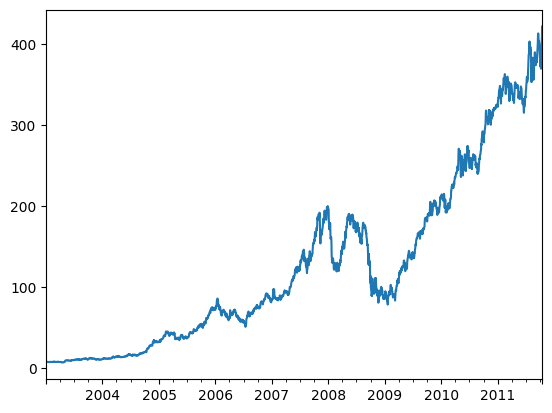

In [168]:
close_px["AAPL"].plot()

<Axes: >

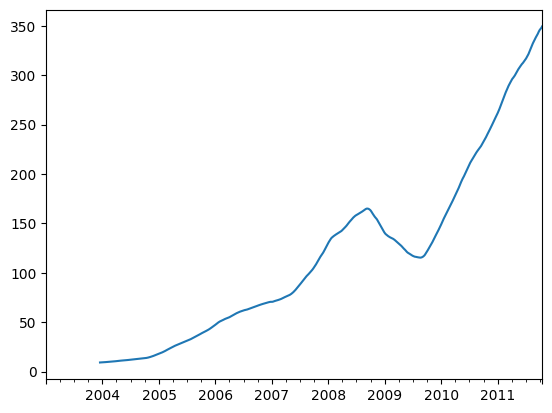

In [169]:
close_px["AAPL"].rolling(250).mean().plot()

In [173]:
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()
std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

<Axes: >

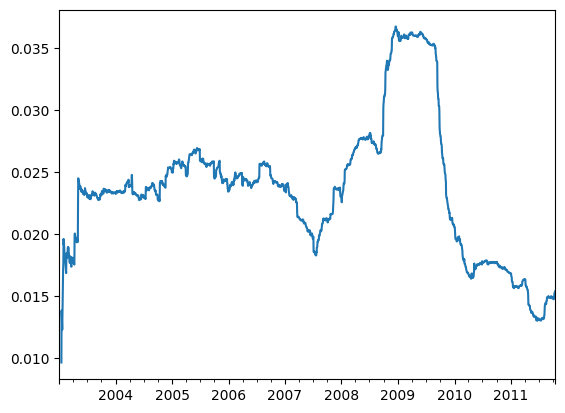

In [174]:
std250.plot()

<Axes: >

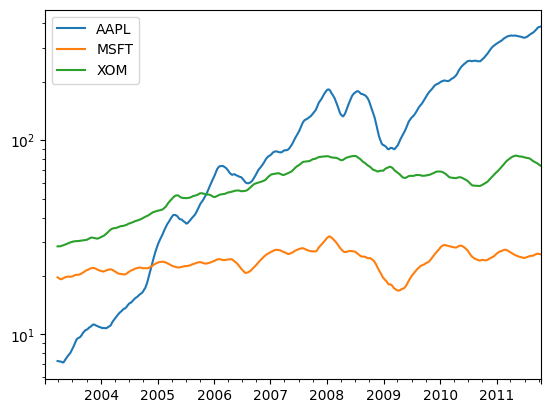

In [175]:
expanding_mean = std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

In [176]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### 指数加权函数

<Axes: >

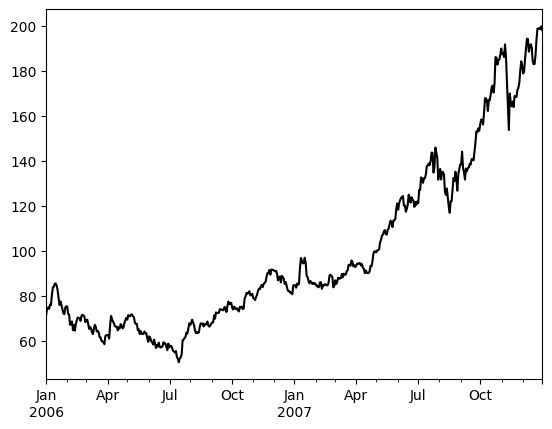

In [177]:
aapl_px = close_px["AAPL"]["2006":"2007"]
ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewma30 = aapl_px.ewm(span=30).mean()
aapl_px.plot(style="k-", label="Price")

<Axes: >

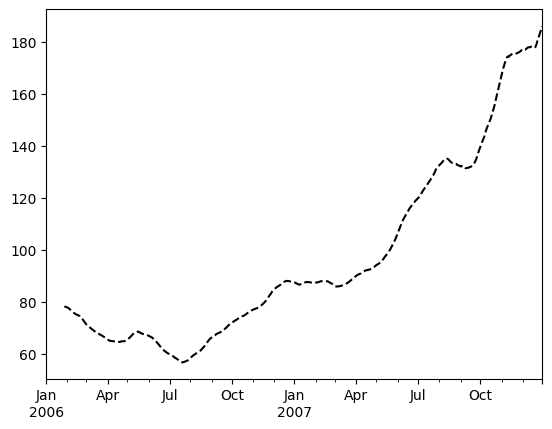

In [178]:
ma30.plot(style="k--", label="Simple Moving Avg")

<Axes: >

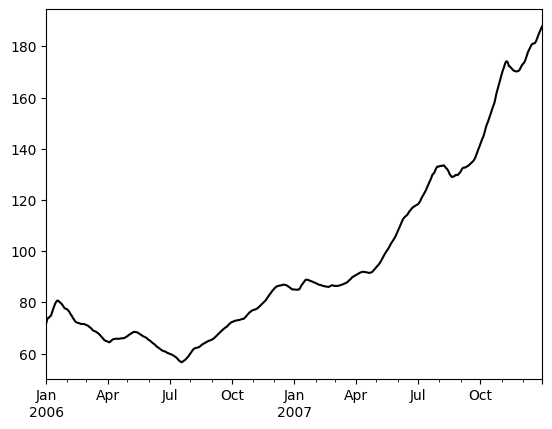

In [179]:
ewma30.plot(style="k-", label="EW MA")

### 二元运算移动窗口函数

<Axes: >

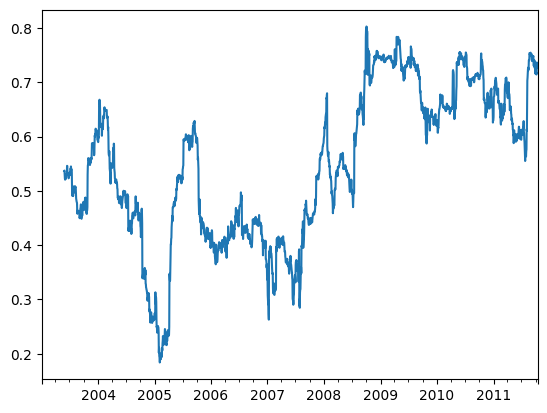

In [180]:
spx_px = close_px_all["SPX"]
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<Axes: >

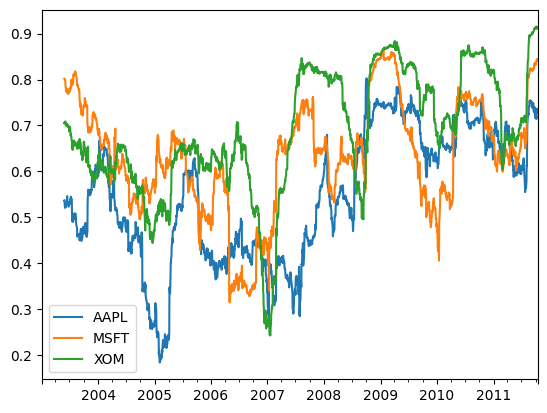

In [181]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### 用户定义的移动窗口功能

<Axes: >

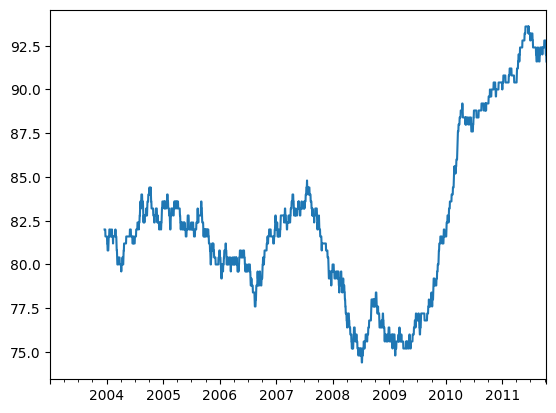

In [182]:
# conda install scipy
from scipy.stats import percentileofscore
def score_at_2percent(x):
       return percentileofscore(x, 0.02)
result = returns["AAPL"].rolling(250).apply(score_at_2percent)
result.plot()